## The theory part of this algorithm can be found in section 10.3 in An Introduction to Statistical Learning by James et al.

In [ ]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

Done


Here's a function for reading in the data.

In [ ]:
def load_data(filepath): # input argument is a string of the filepath
    data = pd.read_csv(filepath) # pandas function for reading in the csv into a nice dataframe

    # We'll use the matrix equation X b = Y. X cntains the data/'coefficients'
    # Y contains the labels of classification
    diagnosis = data['diagnosis'] #This is our Y
    data = data.drop('diagnosis', axis=1) #we want to separate it from X

    id = data['sample_id']
    data = data.drop('sample_id', axis=1)
    #we may want to rethink if we should drop all of these. It might be easiest
    #eventually to use the sample id for the accuracy check
    data = data.drop('sample_origin', axis=1)
    sex = pd.get_dummies(data['sex']) # need to make this column of M F into binary
    data['sex'] = sex['F'] # female are 1, male are 0
    data = data.drop('patient_cohort', axis=1)
    data = data.drop('benign_sample_diagnosis', axis=1)
    data = data.drop('plasma_CA19_9', axis=1)
    data = data.drop('REG1A', axis=1)
    data = data.drop('stage', axis = 1) #I don't think we care about the things that are dropped here
    X = data.values
    Y = diagnosis.values
    numExamples = X.shape[0]
    allOnes = np.ones((numExamples, 1))
    X = np.concatenate((X, allOnes), axis=1)
    # Since this function is general enough to be used for any ML algorithm, we
    # append a column of 1s onto the end of X to be the coefficients for any constant terms
    # i.e., in least squares, we need a column of 1s

    return (X, Y)

The next function contains the actual k-Means code.

In [ ]:
def kMeans(X, numClusters, maxIter):
    numClusters = int(numClusters) #get the number of clusters as an integer
    idx = np.random.choice(len(X), numClusters, replace=False) #pick 3 random points to serve
                                                                #as center of the clusters

    clusters = X[idx, :] #get the data values associated with these indices
    distances = cdist(X, clusters, 'euclidean') #calculate the distances between each row of X and each "cluster center"

    # for each row in X, assign it a label of species according to which cluster center it is closest to
    cluster_assignment = np.array([np.argmin(i) for i in distances])

    for it in range(maxIter): ## now, repeat this process for maxIter
        clusters = []
        for i in range(numClusters):
            vals = X[cluster_assignment == i,:].mean(axis=0)
            clusters.append(vals)

        clusters = np.vstack(clusters)

        distances = cdist(X, clusters, 'euclidean')
        cluster_assignment = np.array([np.argmin(i) for i in distances])

    return cluster_assignment, distances #return the final assignments

Finally, this last part is what acually makes the code run.

In [ ]:
#This is the 'driver' part of the code
maxIter = 1000
numClusters = 3
X, Y = load_data('Debernardi_et_al_2020_data.csv')
#Y = np.argmax(Y, axis=1)
X = X[:, 0:6] # drop the last column - we don't need it

ones = np.ones(len(Y))
Y = Y - ones
c,d = kMeans(X, numClusters, maxIter)

In [ ]:
d

array([[2901.92619283,  494.17410933,  393.03263881],
       [3334.8910813 ,   73.17365763,  820.75218528],
       [3084.65303363,  305.8050608 ,  569.79649399],
       ...,
       [2987.11183777,  448.92151758,  501.19724417],
       [2811.68929463,  584.56496933,  304.85618971],
       [1498.11128975, 1896.41343613, 1022.78327675]])

In [ ]:
c

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1,

In [ ]:
dist_Vals = np.array([np.min(i) for i in d])

val_for_table = np.sum(dist_Vals)
val_for_table

156435.2807123356

We'll use two different techniques to examine how good our clustering is.


First, we'll use visuals (plots of the cluster assignment and cluster center) to check how nicely separated the clusters are. Example code given below.


Second, we'll run the algorithm a few times (maybe 6?) and use the cluster assignment for which the objective function (10.11 in book) is smallest. You can use a loop for this. The results of each run of the algorithm should go in a table, as well as a figure with the points and cluster centers for the best run/result

In [ ]:
m = c.reshape(len(c),1)
X = np.concatenate((X, m), axis=1)
X = pd.DataFrame(X)

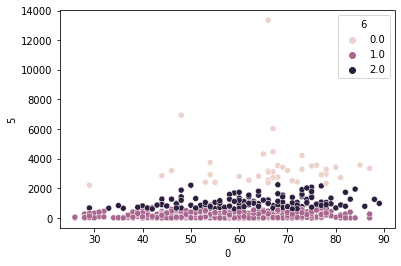

In [ ]:
# Plotting and color-coding

import seaborn as sns

sns.scatterplot(data=X, x=X[0], y=X[5],hue=X[6])
plt.show()